In [ ]:
import cv2, json
import glob
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [ ]:
root = '/media/huynhtruc0309/DATA/vtcc/SUBTASK/TEMPLATE_MATCHING/GD2/1. CPP/85_Switzerland_equal/total'
folder = "2_CPP_Page2"
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
thres = 0.95

for method in methods:
    for img_pth in Path(root, folder).glob('*.jpg'):
        json_pth = str(img_pth).replace('.jpg', '.json')
        if Path(json_pth).is_file():
            # read img
            img = cv2.imread(str(img_pth))
            # read json file
            with open(json_pth) as json_file:
                data = json.load(json_file)
            for shape in data['shapes']:
                # read rect points
                points = np.asarray(shape['points'], dtype=int)
                x1, y1 = points.min(axis=0)
                x2, y2 = points.max(axis=0)
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 0), 2)
                
                gray_img = img.copy()
                gray_img = cv2.cvtColor(gray_img, cv2.COLOR_BGR2GRAY)
                for label in shape['label']:
                    tem_dir = Path(root, folder, 'templates', label)
                    for tem_path in tem_dir.glob('*.jpg'):
                        tem_img = cv2.imread(str(tem_path), 0)
                        w, h = tem_img.shape
                        # Apply template Matching
                        res = cv2.matchTemplate(gray_img, tem_img, eval(method))
                        # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
                        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
                            top_left, val = min_loc, min_val
                        else:
                            top_left, val = max_loc, max_val
                        bottom_right = (top_left[0] + w, top_left[1] + h)
#                         text_color = (0,0,255) if round(val, 2) >= thres else (255,0,0)
                        text_color = (255,0,0)
                        cv2.rectangle(img, top_left, bottom_right, text_color, 2)
                        cv2.putText(img, str(val), top_left, cv2.FONT_HERSHEY_SIMPLEX, 1, text_color, 2, cv2.LINE_AA)
            out_img_pth = Path(root, folder, 'outputs', method)
            out_img_pth.mkdir(parents=True, exist_ok=True)
            out_img_pth = Path(out_img_pth, img_pth.name)
            cv2.imwrite(str(out_img_pth), img)

# Run right

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img_color_src = cv.imread('/media/huynhtruc0309/DATA/vtcc/SUBTASK/TEMPLATE_MATCHING/GD2/1. CPP/85_Switzerland_equal/total/2_CPP_Page2/CPP-1885.TĐNN-2019-VN-18395-14-page3.jpg')
# img = cv.imread('/media/huynhtruc0309/DATA/vtcc/SUBTASK/TEMPLATE_MATCHING/GD2/1. CPP/85_Switzerland_equal/total/2_CPP_Page2/1. NN-34241-page2.jpg',0)
img = img_color_src.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = img.copy()
template = cv.imread('/media/huynhtruc0309/DATA/vtcc/SUBTASK/TEMPLATE_MATCHING/GD2/1. CPP/85_Switzerland_equal/total/2_CPP_Page2/templates/1/1. NN-34241-page2.jpg',0)
w, h = template.shape[::-1]
print(w, h)
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    img_color = img_color_src.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img_color,top_left, bottom_right, (139, 0, 0), 2)
    print(top_left, bottom_right)
    out_img_pth = Path(root, folder, 'outputs')
    out_img_pth.mkdir(parents=True, exist_ok=True)
    out_img_pth = Path(out_img_pth, meth)
    print(out_img_pth)
    cv2.imwrite(str(out_img_pth)+'.jpg', img_color)
# #     plt.subplot(121),plt.imshow(res,cmap = 'gray')
# #     plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
#     plt.subplot(122),plt.imshow(img_color)
#     plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
#     plt.suptitle(meth)
#     plt.show()

# Try multiscale

In [56]:
import numpy as np
from pathlib import Path
import cv2
from matplotlib import pyplot as plt
import json

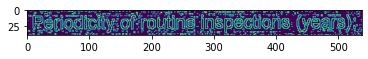

Image
cv2.TM_SQDIFF_NORMED 0.19 1.0


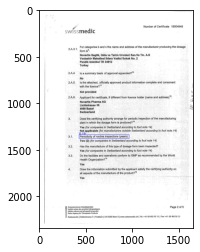

In [52]:
template = cv2.imread('2_CPP_Page2/templates/12/1. NN-34241-page2.jpg')
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 30, 150)
(tH, tW) = template.shape[:2]
plt.imshow(template)
plt.show()

for imagePath in Path('2_CPP_Page2').glob('*.jpg'):
#     if '1. NN-34241-page2.jpg' not in str(imagePath):
#         continue
    image = cv2.imread(str(imagePath))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    found = None

    for scale in np.linspace(0.2, 1.0, 20)[::-1]:
        width = int(gray.shape[1] * scale)
        height = int(gray.shape[0] * scale)
        resized = cv2.resize(gray, (width, height), interpolation = cv2.INTER_AREA)
        r = gray.shape[1] / float(resized.shape[1])
        if resized.shape[0] < tH or resized.shape[1] < tW:
            break
        edged = cv2.Canny(resized, 30, 150)
        result = cv2.matchTemplate(edged, template, cv2.TM_CCORR_NORMED)
        (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result) 

        if found is None or maxVal > found[0]:
            found = (maxVal, maxLoc, r)

    (_, maxLoc, r) = found
    (startX, startY) = (int(maxLoc[0]*r), int(maxLoc[1]*r))
    (endX, endY) = (int((maxLoc[0]+tW)*r), int((maxLoc[1]+tH)*r))

    print('Image')
    print(meth, str(round(maxVal, 2)), r)
    cv2.rectangle(image, (startX, startY), (endX, endY), (0,0,255), 2)
    cv2.putText(image, str(round(maxVal, 2)), (startX, startY), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)
    plt.imshow(image)
    plt.show()

    out_img_pth = Path('2_CPP_Page2', 'outputs')
    out_img_pth.mkdir(parents=True, exist_ok=True)
    out_img_pth = Path(out_img_pth, imagePath.name)
    cv2.imwrite(str(out_img_pth), image)

In [115]:
f_x_h, f_y_h, f_x_l, f_y_l = find_area()

In [116]:
for imagePath in Path('2_CPP_Page2').glob('*.jpg'):
    print('Image', imagePath)
    image = cv2.imread(str(imagePath))
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # draw the ground truth
    json_pth = str(imagePath).replace('.jpg', '.json')
    with open(json_pth) as json_file:
        data = json.load(json_file)
    
    for shape in data['shapes']:
        # read rect points
        points = np.asarray(shape['points'], dtype=int)
        x1, y1 = points.min(axis=0)
        x2, y2 = points.max(axis=0)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 0, 0), 2)
        
    for tem_dir in Path('2_CPP_Page2', 'templates').glob('**/*.jpg'):
        print('Template', str(tem_dir))
        template_color = cv2.imread(str(tem_dir))
        template = cv2.cvtColor(template_color, cv2.COLOR_BGR2GRAY)
        template = cv2.Canny(template, 30, 150)
        (tH, tW) = template.shape[:2]
        found = None

        for scale in np.linspace(0.2, 1.0, 20)[::-1]:
            width = int(gray.shape[1] * scale)
            height = int(gray.shape[0] * scale)
            resized = cv2.resize(gray, (width, height), interpolation = cv2.INTER_AREA)
            r = gray.shape[1] / float(resized.shape[1])
            if resized.shape[0] < tH or resized.shape[1] < tW:
                break
            x1, y1, x2, y2 = int(f_x_h*height), int(f_y_h*width), int(f_x_l*height), int(f_y_l*width)
            edged = cv2.Canny(resized[y1:y2, x1:x2], 30, 150)
            result = cv2.matchTemplate(edged, template, cv2.TM_CCORR_NORMED)
            (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result) 

            if found is None or maxVal > found[0]:
                found = (maxVal, maxLoc, r)

        (_, maxLoc, r) = found
        (startX, startY) = (int(maxLoc[0]*r), int(maxLoc[1]*r))
        (endX, endY) = (int((maxLoc[0]+tW)*r), int((maxLoc[1]+tH)*r))

        cv2.rectangle(image, (startX, startY), (endX, endY), (0,0,255), 2)
        cv2.putText(image, str(round(maxVal, 2)), (startX, startY), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)

    out_img_pth = Path('2_CPP_Page2', 'outputs')
    out_img_pth.mkdir(parents=True, exist_ok=True)
    out_img_pth = Path(out_img_pth, imagePath.name)
    cv2.imwrite(str(out_img_pth), image)

Image 2_CPP_Page2/1. NN-34241-page2.jpg
Template 2_CPP_Page2/templates/1/1. NN-34241-page2.jpg


error: OpenCV(3.4.2) /tmp/build/80754af9/opencv-suite_1535558553474/work/modules/imgproc/src/templmatch.cpp:1107: error: (-215:Assertion failed) _img.size().height <= _templ.size().height && _img.size().width <= _templ.size().width in function 'matchTemplate'


# Locate area

In [114]:
def find_area():
    f_x_h, f_y_h, f_x_l, f_y_l = float('inf'), float('inf'), 0.0, 0.0

    for imagePath in Path('2_CPP_Page2').glob('*.jpg'):
        image = cv2.imread(str(imagePath))

        json_pth = str(imagePath).replace('.jpg', '.json')
        with open(json_pth) as json_file:
            data = json.load(json_file)

        for shape in data['shapes']:
            points = np.asarray(shape['points'], dtype=int)
            x1, y1 = points.min(axis=0)
            x2, y2 = points.max(axis=0)

            f_x_h, f_y_h, f_x_l, f_y_l = min(x1/image.shape[1], f_x_h), min(y1/image.shape[0], f_y_h), max(x2/image.shape[1], f_x_l), max(y2/image.shape[0], f_y_l)
        
        return f_x_h, f_y_h, f_x_l, f_y_l